**Real-time data (RTD)** is information that is delivered immediately after collection. There is no delay in the timeliness of the information provided. Real-time data is often used for navigation or tracking.[1] Such data is usually processed using real-time computing although it can also be stored for later or off-line data analysis.

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import time
import csv
from IPython.display import clear_output, Image, display
import random
from itertools import count
import threading

**STATIC PLOT**

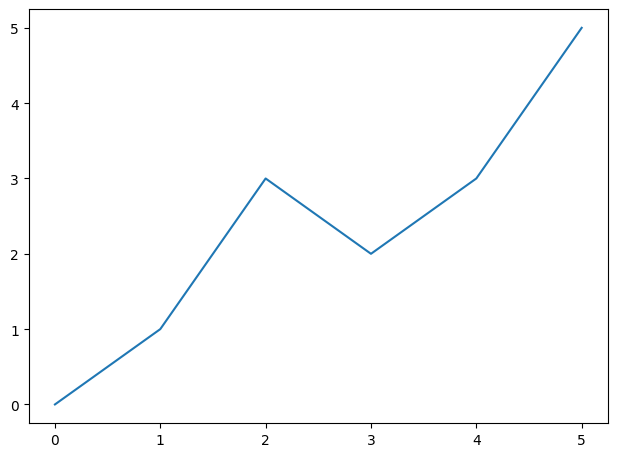

In [3]:
x_vals = [0, 1, 2, 3, 4, 5]
y_vals = [0, 1, 3, 2, 3, 5]

plt.plot(x_vals, y_vals)

plt.style.use('fivethirtyeight')
plt.tight_layout()

#Real time visualization

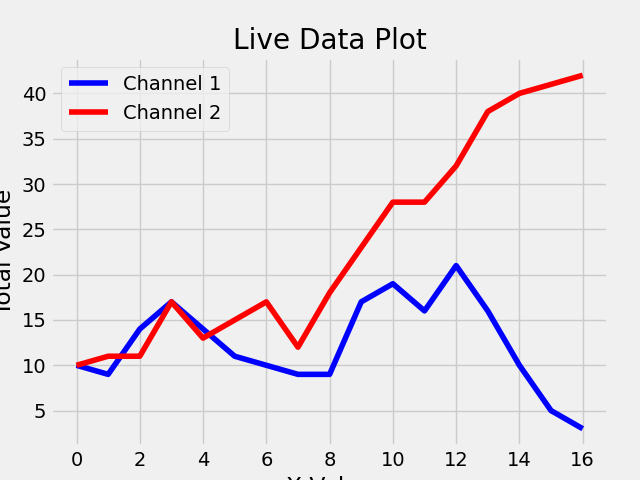

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import time
import csv
from IPython.display import clear_output, Image, display
from threading import Thread

# Initialize values for CSV writing
x_value = 0
total_1 = 10
total_2 = 10

fieldnames = ["x_value", "total_1", "total_2"]

# Create and write header to the CSV file
with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

# Function to generate and write live data to CSV
def generate_data():
    global x_value, total_1, total_2
    for _ in range(100):  # Limit the loop for this demo
        with open('data.csv', 'a') as csv_file:
            csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            info = {
                "x_value": x_value,
                "total_1": total_1,
                "total_2": total_2
            }
            csv_writer.writerow(info)
            print(f"Writing Data: {x_value}, {total_1}, {total_2}")

            x_value += 1
            total_1 += random.randint(-6, 8)
            total_2 += random.randint(-5, 6)

        time.sleep(1)

# Function to update the plot and save it as an image
def update_plot():
    for _ in range(100):  # Limit the loop for this demo
        data = pd.read_csv('data.csv')

        x = data['x_value']
        y1 = data['total_1']
        y2 = data['total_2']

        plt.cla()  # Clear the current plot
        plt.plot(x, y1, label='Channel 1', color='b')
        plt.plot(x, y2, label='Channel 2', color='r')
        plt.legend(loc='upper left')
        plt.title('Live Data Plot')
        plt.xlabel('X Value')
        plt.ylabel('Total Value')

        # Save the current figure as an image
        plt.savefig('live_plot.png')

        # Clear the output and display the saved image
        clear_output(wait=True)
        display(Image('live_plot.png'))

        time.sleep(1)

# Generate live data in the background
data_thread = Thread(target=generate_data)
data_thread.start()

# Start live plot updates
update_plot()